<a href="https://colab.research.google.com/github/AkankshaB123/fraud_detection_mitigation/blob/main/Model_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Pandas Version: 2.2.2
Numpy Version: 2.0.2
Matplotlib Version: 3.10.0
Seaborn Version: 0.13.2
Path to dataset files: /kaggle/input/creditcardfraud


100%|██████████| 66.0M/66.0M [00:03<00:00, 22.3MB/s]

Extracting files...


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

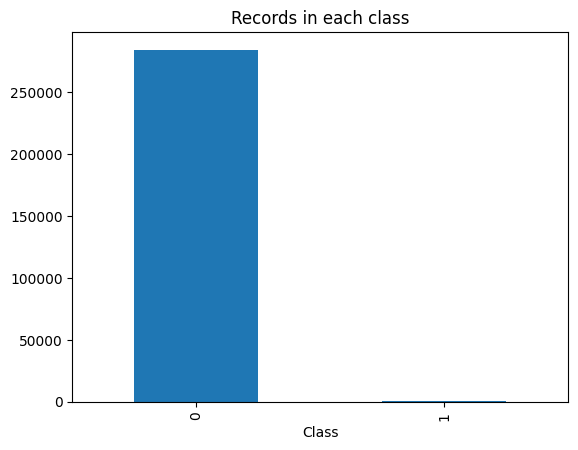

Fraud transactions are as follows 0.17 %
Normal transactions are as follows 99.83 %


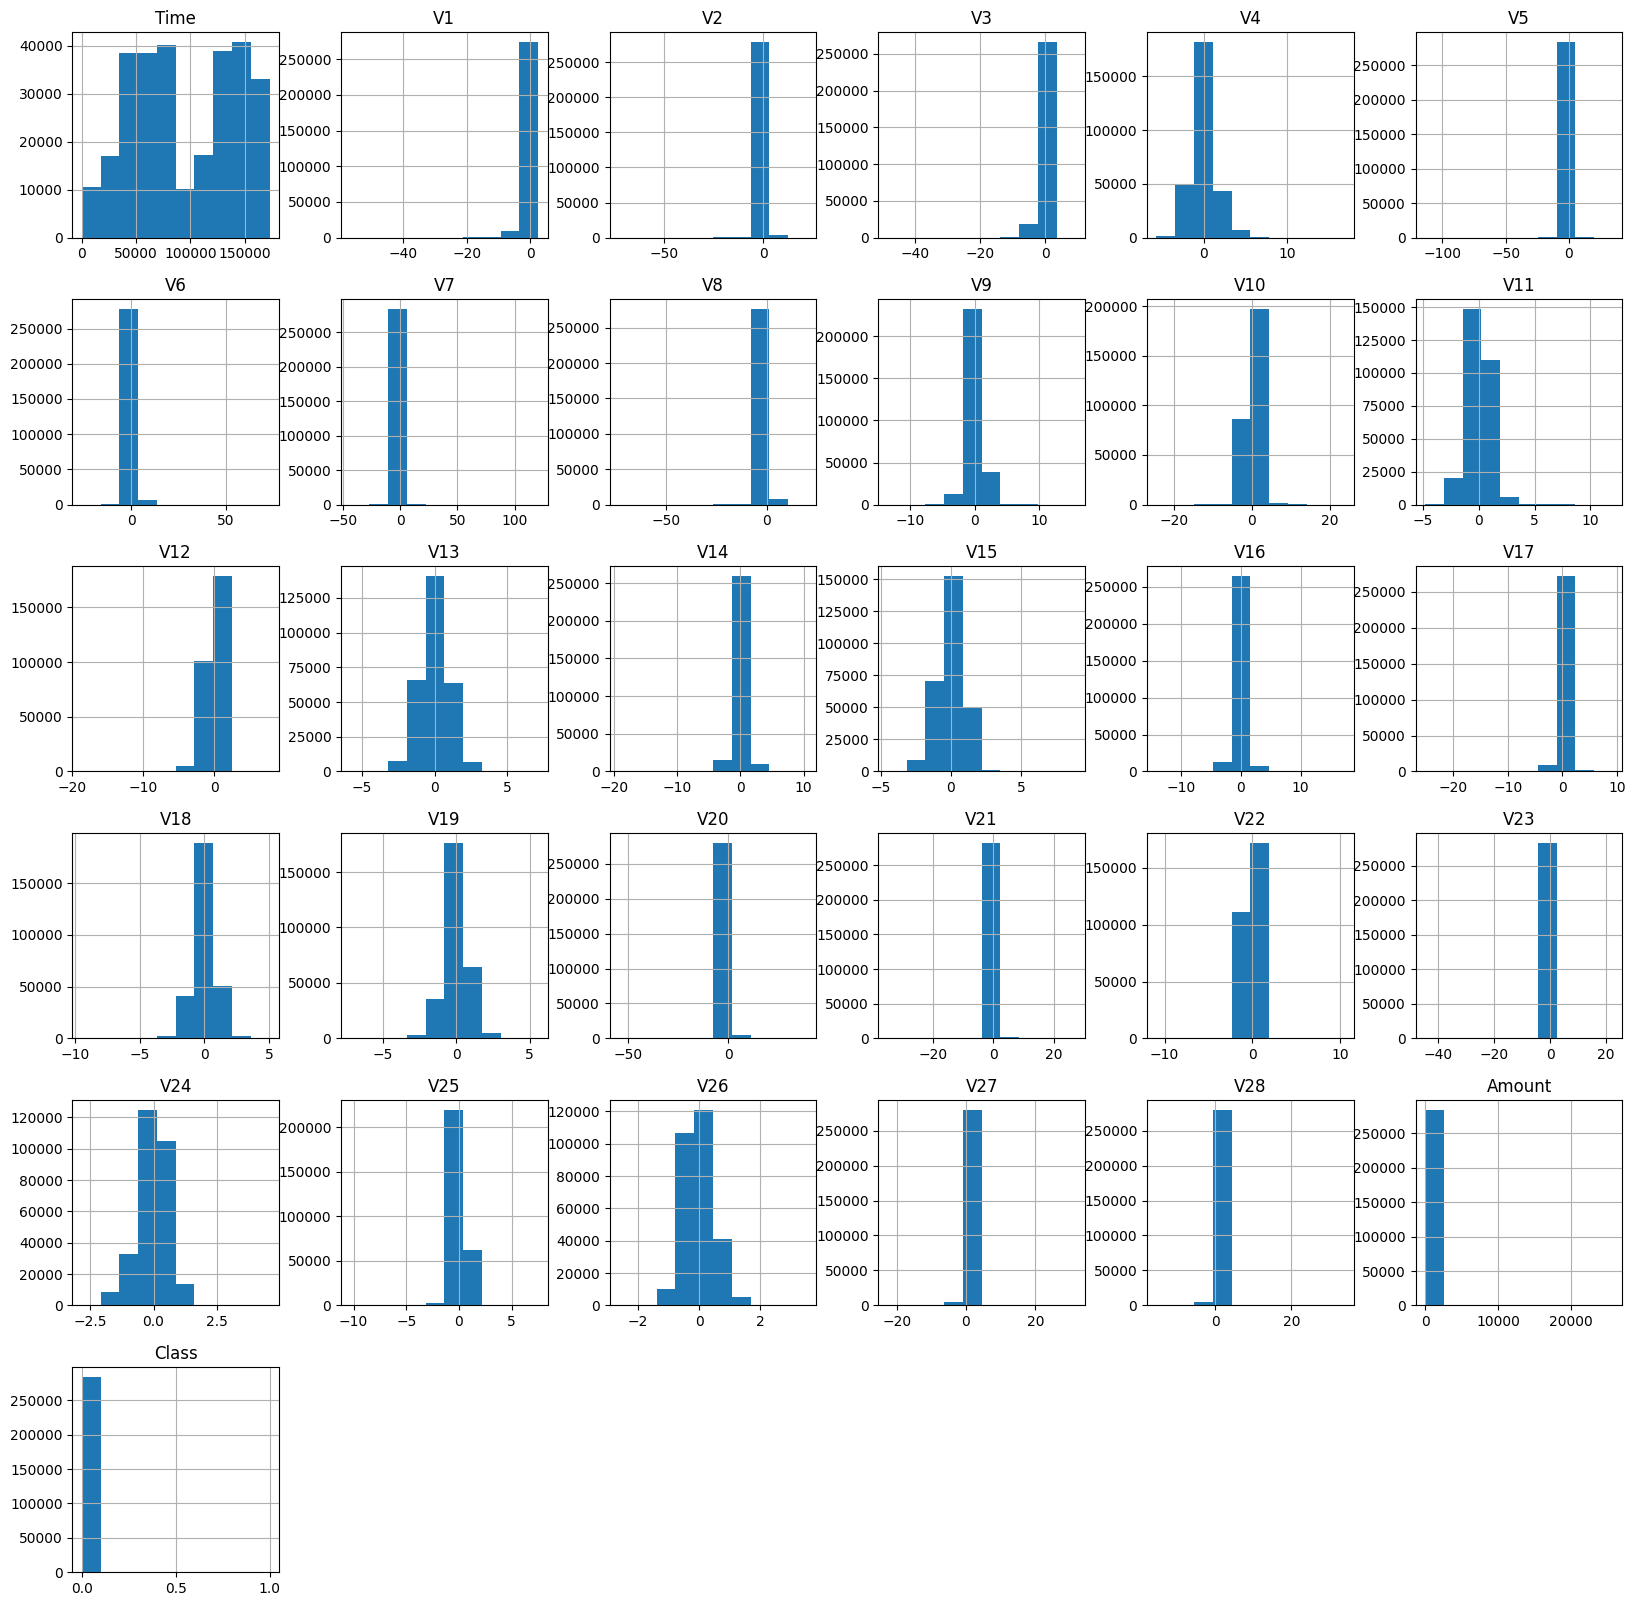

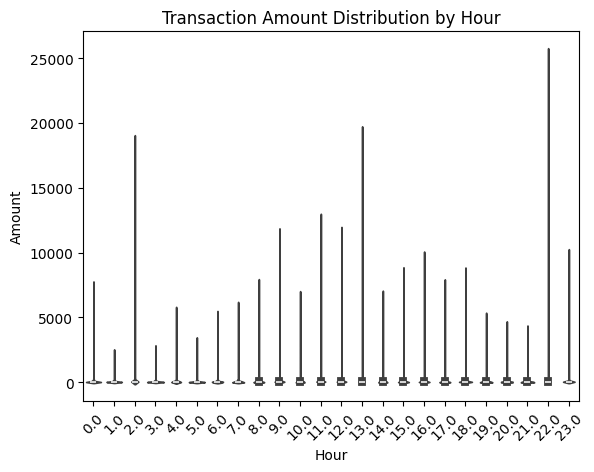

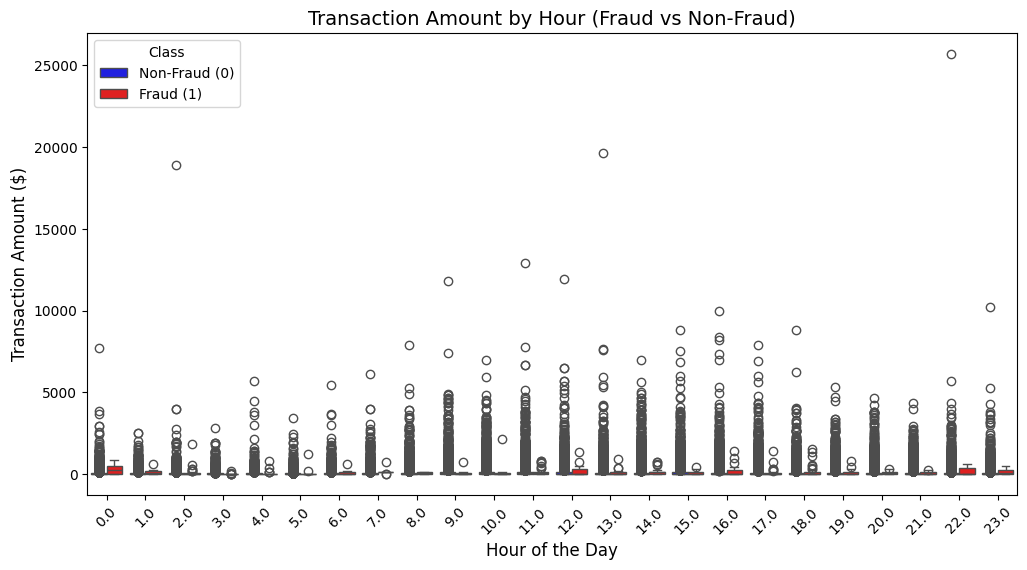

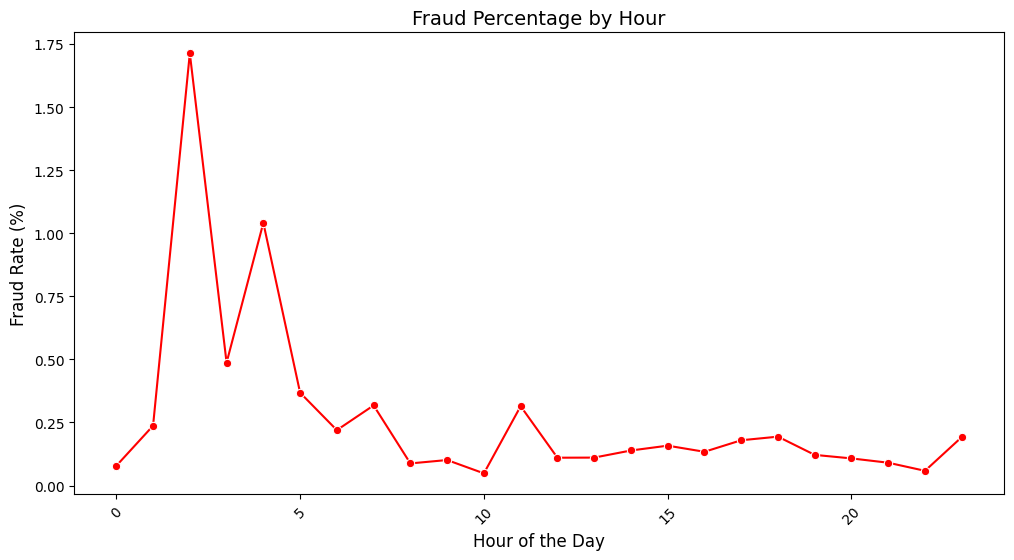

Fraud + outlier % cases are: 0.29 %
Non-Fraud + outlier % cases are: 99.71 %


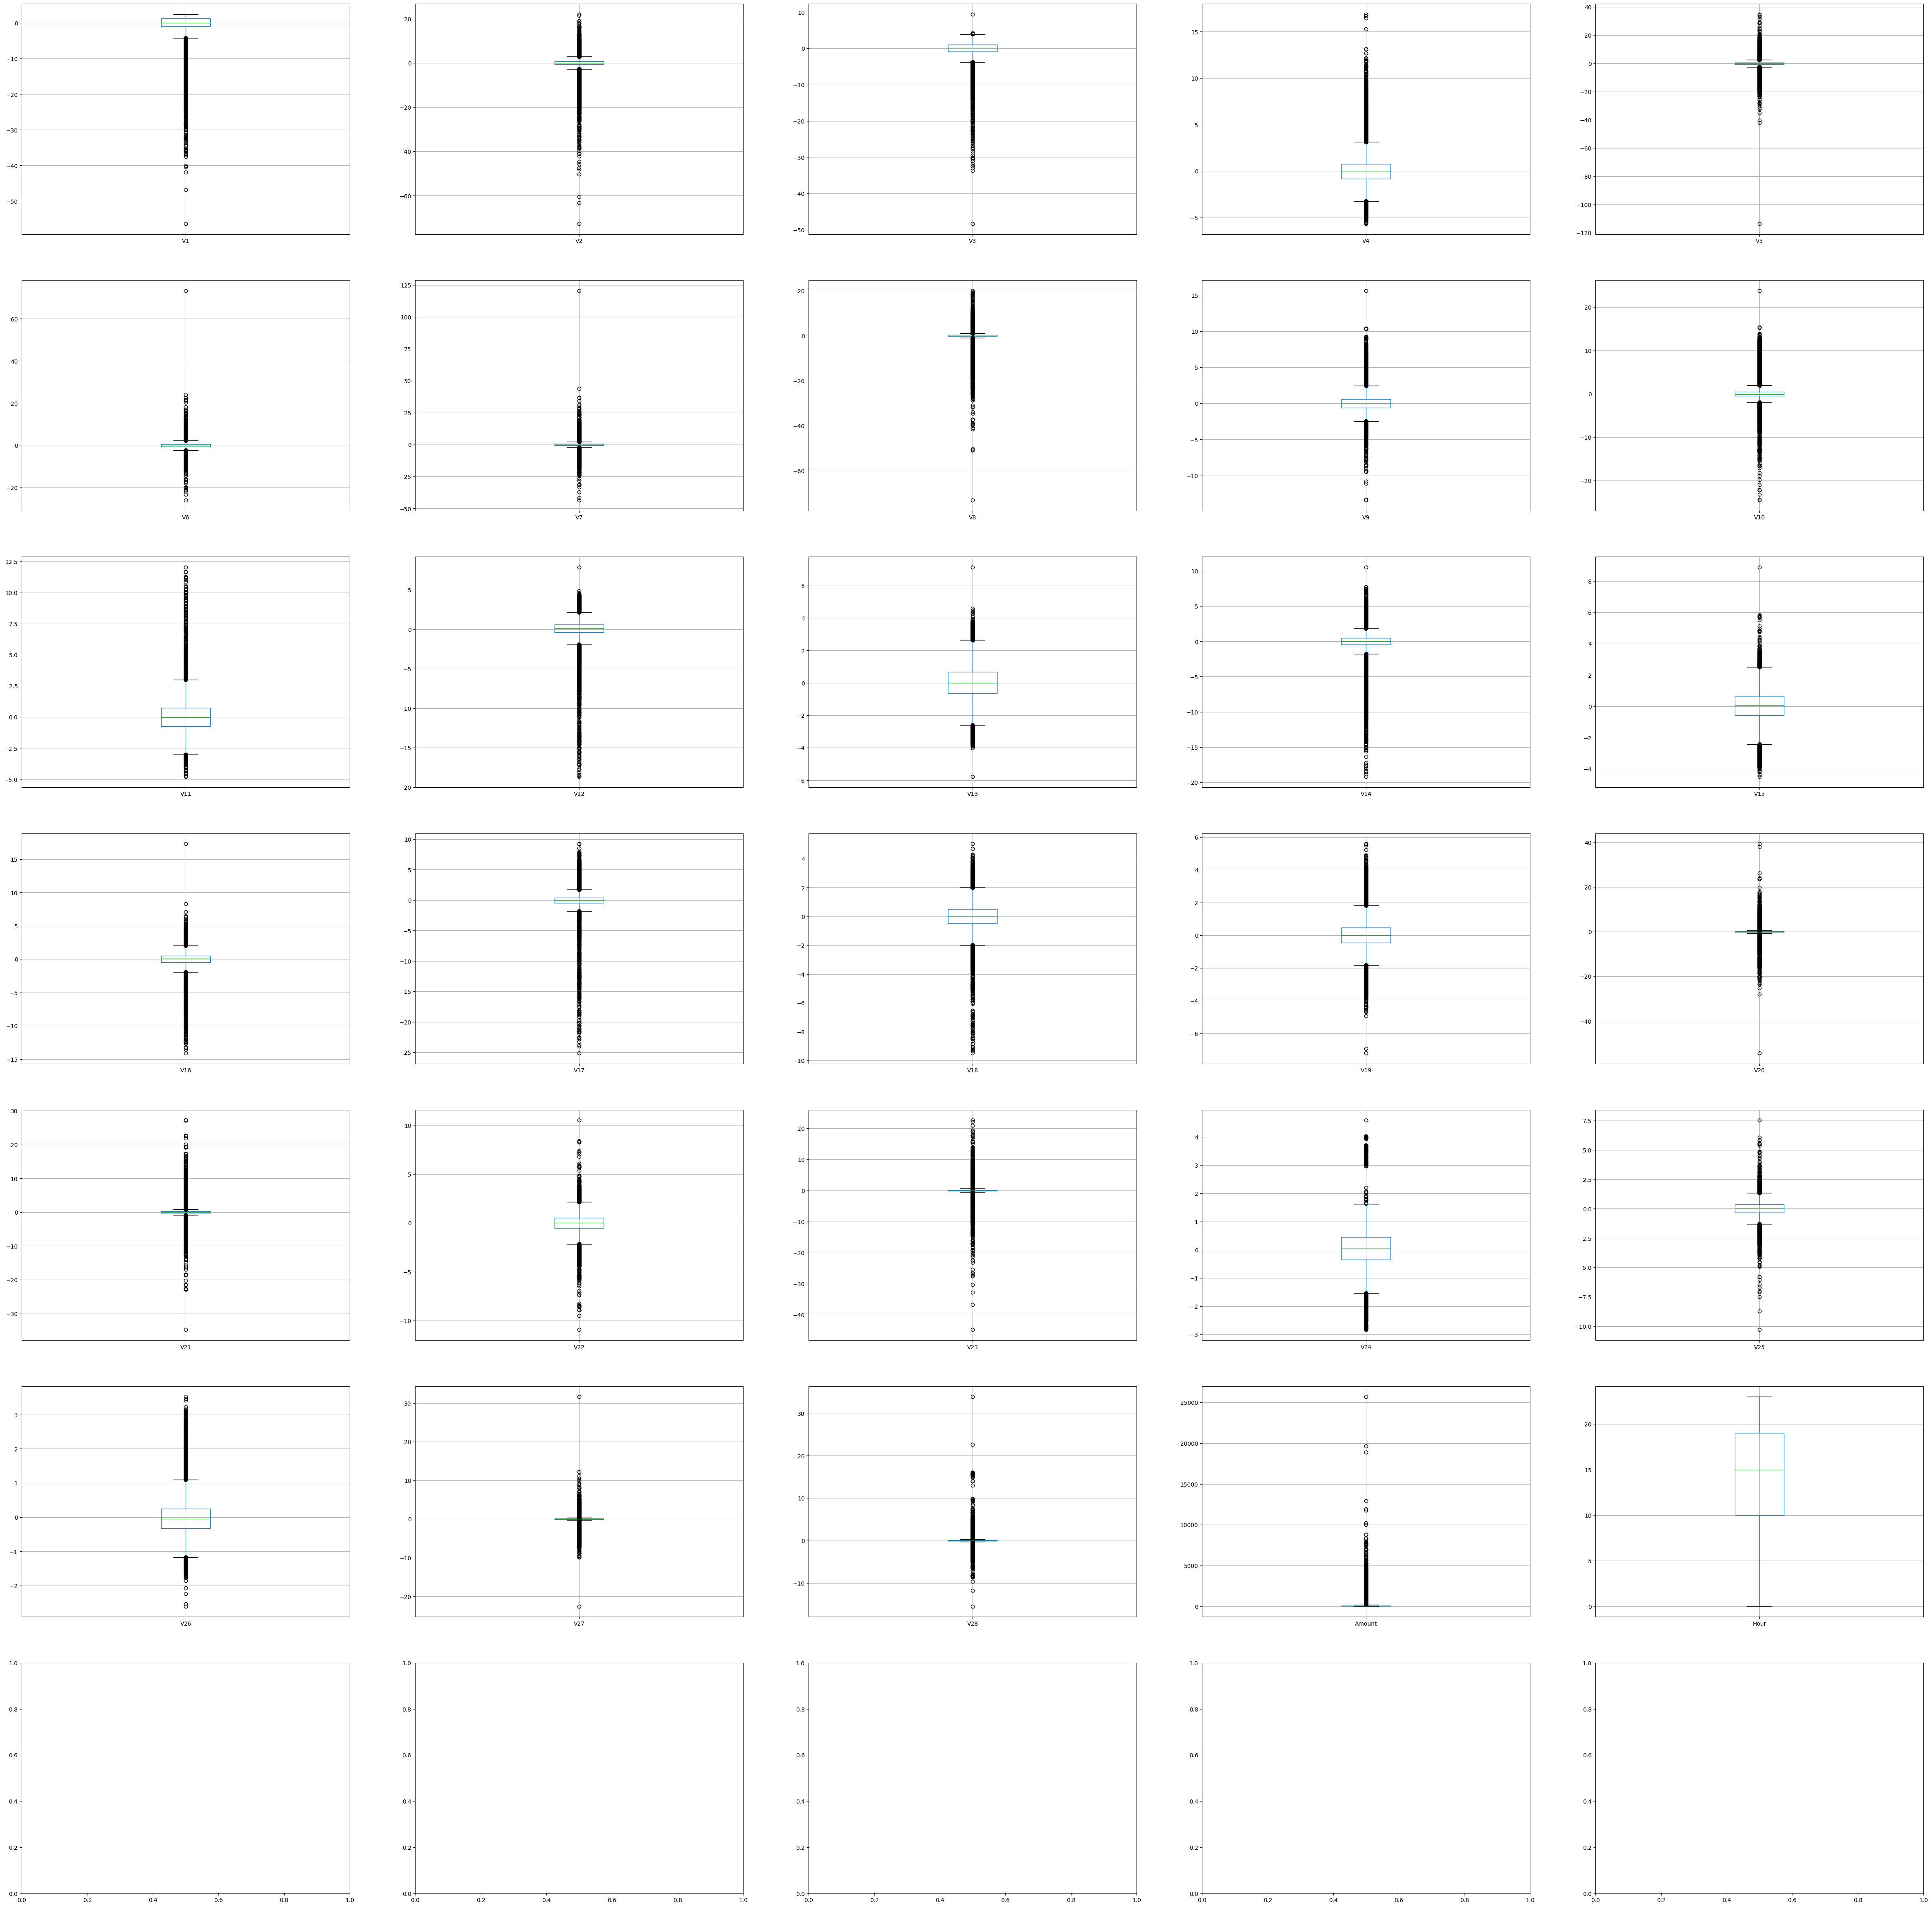

Class
0    492
1    492
Name: count, dtype: int64
Class
0    284315
1    284315
Name: count, dtype: int64
Class
0    284315
1    284315
Name: count, dtype: int64
Class
0    284315
1    284315
Name: count, dtype: int64
X_undersampled shape: (984, 32)
X_oversampled shape: (568630, 32)
X_smote shape: (568630, 32)
X_random_oversampler shape: (568630, 32)

y_undersampled shape: (984,)
y_oversampled shape: (568630,)
y_smote shape: (568630,)
y_random_oversampler shape: (568630,)
🔷 Features (X) — These are 2D arrays of shape (number of samples, number of features):
X_train_undersampled shape: (688, 32) → 2D array → Rows = individual data points (samples), Columns = variables describing each point (features)
X_test_undersampled shape: (296, 32)
X_train_oversampled shape: (398041, 32)
X_test_oversampled shape: (170589, 32)
X_train_smote shape: (398041, 32)
X_test_smote shape: (170589, 32)
X_train_random_oversampler shape: (398041, 32)
X_test_random_oversampler shape: (170589, 32)

🔶 Labels (y) —

In [22]:
from google.colab import drive
drive.mount('/content/drive')

# Then run the notebook
# Correct the path to the notebook if necessary.
# Verify the file 'EDA.ipynb' exists in the specified location.
%run "/content/drive/MyDrive/Colab Notebooks/Data Pre Processing and Modelling.ipynb"

# **Data Pre-processing**
1. Google colab has RAM limitations so run sampling technique in different lines

In [23]:
# For undersampled training data
X_train_under_scaled, encoder_under, scaler_under = preprocess_features(X_train_undersampled)

In [24]:
# For smote training data
X_train_smote_scaled, encoder_over, scaler_over = preprocess_features(X_train_smote)

In [25]:
log_pred_under, model_under, scaler_under, results_under = run_logistic_pipeline(
    X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled)

print("📈 Evaluation Metrics (Undersampled):")
for metric, value in results_under['Metrics'].items():
    print(f"{metric}: {value:.2f}%")  # Print metrics with percentages

print("\n📊 Confusion Matrix (Undersampled):")
print(results_under['Confusion Matrix'])

📈 Evaluation Metrics (Undersampled):
Accuracy: 64.53%
Precision: 80.00%
Recall: 46.91%
F1-Score: 59.14%

📊 Confusion Matrix (Undersampled):
[[115  19]
 [ 86  76]]


In [ ]:
# X_train_undersampled shape: (688, 32) → 2D array → Rows = individual data points (samples), Columns = variables describing each point (features)
# X_test_undersampled shape: (296, 32)
# X_train_oversampled shape: (398041, 32)
# X_test_oversampled shape: (170589, 32)
# X_train_smote shape: (398041, 32)
# X_test_smote shape: (170589, 32)
# X_train_random_oversampler shape: (398041, 32)
# X_test_random_oversampler shape: (170589, 32)

# 🔶 Labels (y) — These are 1D arrays of shape (number of samples,):
# y_train_undersampled shape: (688,) → 1D array → One label per sample indicating the target class (e.g., 0 = No, 1 = Yes)
# y_test_undersampled shape: (296,)
# y_train_oversampled shape: (398041,)
# y_test_oversampled shape: (170589,)
# y_train_smote shape: (398041,)
# y_test_smote shape: (170589,)
# y_train_random_oversampler shape: (398041,)
# y_test_random_oversampler shape: (170589,)

In [27]:
log_pred_smote, model_smote, scaler_smote, results_smote = run_logistic_pipeline(
    X_train_smote, X_test_smote, y_train_smote, y_test_smote)

print("📈 Evaluation Metrics (SMOTE):")
for metric, value in results_under['Metrics'].items():
    print(f"{metric}: {value:.2f}%")  # Print metrics with percentages

print("\n📊 Confusion Matrix (SMOTE):")
print(results_under['Confusion Matrix'])

📈 Evaluation Metrics (Undersampled):
Accuracy: 98.04%
Precision: 99.13%
Recall: 96.94%
F1-Score: 98.02%

📊 Confusion Matrix (Undersampled):
[[84418   723]
 [ 2615 82833]]
